In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from scipy import stats 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer


In [2]:
data_file = r"C:\Users\kkaus\OneDrive - HKUST Connect\Courses\Year 3\COMP 4331\Coding Folder\Assignments\Assignment 1\data\student-por.csv"
data_df = pd.read_csv(data_file, sep=";")


# Task 1

## Basic summary for age 

In [3]:
mean_age = data_df['age'].mean()
median_age = data_df['age'].median()
mode_age = data_df['age'].mode()
std_age = data_df['age'].std()

print("The mean of age is: ", mean_age)
print("The median of age is: ", median_age)
print("The mode of age is: ", mode_age)
print("The standard deviation of age is: ", std_age)

The mean of age is:  16.7442218798151
The median of age is:  17.0
The mode of age is:  0    17
dtype: int64
The standard deviation of age is:  1.2181376394800618


In [4]:
data_df['age'].describe() #Provides the 5 number summary of the variable age 

count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

## Basic summary for G1

In [5]:
mean_G1 = data_df['G1'].mean()
median_G1 = data_df['G1'].median()
mode_G1 = data_df['G1'].mode()
std_G1 = data_df['G1'].std()

print("The mean of G1 is: ", mean_G1)
print("The median of G1 is: ", median_G1)
print("The mode of G1 is: ", mode_G1)
print("The standard deviation of G1 is: ", std_G1)

The mean of G1 is:  11.399075500770415
The median of G1 is:  11.0
The mode of G1 is:  0    10
dtype: int64
The standard deviation of G1 is:  2.745265128446369


In [6]:
data_df['G1'].describe() #5 number summary of the variable G1 

count    649.000000
mean      11.399076
std        2.745265
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

# Task 2

## Boxplot for G2 

<AxesSubplot:ylabel='G2'>

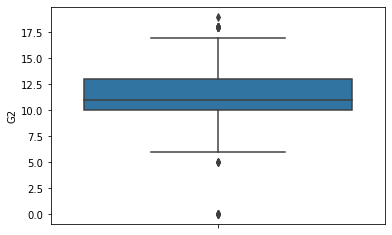

In [7]:
sns.boxplot(data=data_df, y = "G2")

## Boxplot of G2 with sex as the x-axis 

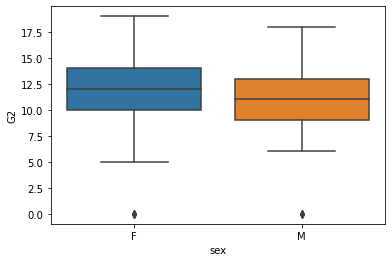

In [8]:
sns.boxplot(data=data_df, x = "sex", y = "G2");

## Boxplot for G2 with Dalc in the x-axis 

<AxesSubplot:xlabel='Dalc', ylabel='G2'>

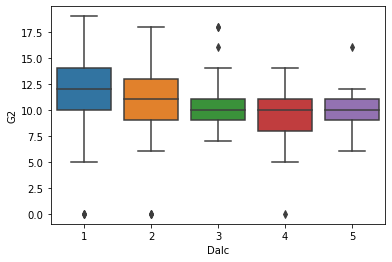

In [9]:
sns.boxplot(data=data_df, x = "Dalc", y = "G2")

# Task 3

## Histogram for age 

<AxesSubplot:xlabel='age', ylabel='Count'>

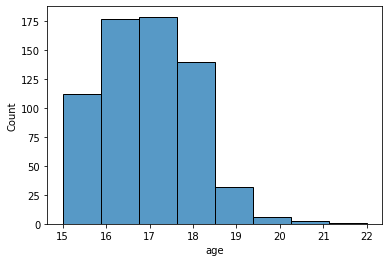

In [10]:
sns.histplot(data=data_df, x = "age", bins = 8)

## Histogram for absences 

<AxesSubplot:xlabel='absences', ylabel='Count'>

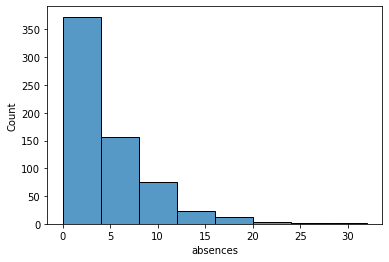

In [11]:
sns.histplot(data=data_df, x = "absences", bins = 8)

# Task 4

<AxesSubplot:xlabel='G2', ylabel='G3'>

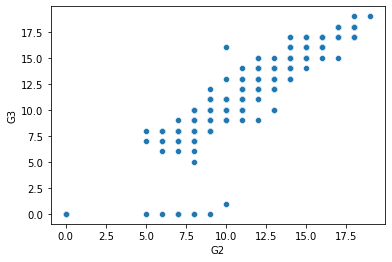

In [12]:
sns.scatterplot(data=data_df, x="G2", y="G3")

In [13]:
data_df[["G2", "G3"]].corr(method='pearson')
#Therefore, the correlation coefficient between G2 and G3 is 0.918548 

,G2,G3
G2,1.000000,0.918548
G3,0.918548,1.000000


# Task 5

In [14]:
#Finding the correlation coefficient of each of the following attributes with G1 and finding the top 5 

attributes = ["studytime", "traveltime", "age", "absences", "health", "Walc", "Dalc", "famrel", "goout", "G2"]
correlations = []
att = 0 

for i in range(len(attributes)): 
    mean_1 = data_df['G1'].mean()  
    mean_2 = data_df[attributes[i]].mean() 
    std_1 = data_df['G1'].std()
    std_2 = data_df[attributes[i]].std()

    numerator = np.mean((data_df['G1']-mean_1) * (data_df[attributes[i]]-mean_2))
    denominator = std_1*std_2 

    corr = numerator / denominator 
    correlations.append(abs(corr))

count = 0 
final_attributes = []
final_values = []
range_f = 10 

while count <= 5: 
    for i in range(0, range_f):
        max_f = max(correlations)
        if correlations[i] == max_f: 
            range_f = range_f - 1
            count = count + 1
            final_attributes.append(attributes[i])
            final_values.append(correlations[i])
    correlations.remove(max_f)
    attributes.remove(attributes[i])





print("The top 5 attributes with the highst correlation with G1 are: ", final_attributes) 
print("The correlation coefficient of these values are respectively: ", final_values)


The top 5 attributes with the highst correlation with G1 are:  ['G2', 'studytime', 'Walc', 'traveltime', 'absences', 'studytime']
The correlation coefficient of these values are respectively:  [0.8636488388905413, 0.260473415166327, 0.19487020856239282, 0.1740536382340382, 0.15540965666159198, 0.15388214866117852]


# Task 6

In [15]:
#Question part a 
#COntingency table of internet and romantic 
crosstab = pd.crosstab(data_df['internet'], data_df['romantic'])
crosstab

romantic,no,yes
internet,,
no,100,51
yes,310,188


In [16]:
from scipy import stats
chi2, p, dof, _ = stats.chi2_contingency(crosstab)
print("chi^2: {:.6f}, p: {:.6f}, dof: {:.6f}".format(chi2, p, dof))


#The X^2 value is 0.625769 which is smaller than 6.64 (value at signifiance level 0.01 with degree of freedom 1)
#This means we accept the hypothesis that internet and romantic are independent 

chi^2: 0.625769, p: 0.428912, dof: 1.000000


In [17]:
#Question part b 
#Contingency table for sex and romantic 
crosstab2 = pd.crosstab(data_df['sex'], data_df['romantic'])
crosstab2

romantic,no,yes
sex,,
F,225,158
M,185,81


In [18]:
chi2, p, dof, _ = stats.chi2_contingency(crosstab2)
print("chi^2: {:.6f}, p: {:.6f}, dof: {:.6f}".format(chi2, p, dof))

#The X^2 value is 7.415931 which is highe than 6.64 (value at significance level 0.01 and degree of freedom 0.01)
#This means we can reject the hypothesis, as a result we can state that the attributes 'sex' and 'romantic' is not independent. 

chi^2: 7.415931, p: 0.006465, dof: 1.000000


# Task 7 

## Part a -- normalization of studytime using min-max normalization 

In [19]:
scale = MinMaxScaler(feature_range=(0, 1))

data_df['studytime_scaled'] = scale.fit_transform(data_df[['studytime']])
data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,studytime_scaled
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0.333333


## Part b -- normalization of {G1, G2, G3, Dalc, Walc} using z-score normalization 

In [20]:
scaler = StandardScaler()
data_df['G1_scaled'] = scaler.fit_transform(data_df[['G1']])

data_df['G2_scaled'] = scaler.fit_transform(data_df[['G2']])

data_df['G3_scaled'] = scaler.fit_transform(data_df[['G3']])

data_df['Dalc_scaled'] = scaler.fit_transform(data_df[['Dalc']])

data_df['Walc_scaled'] = scaler.fit_transform(data_df[['Walc']])

data_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1,G2,G3,studytime_scaled,G1_scaled,G2_scaled,G3_scaled,Dalc_scaled,Walc_scaled
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,0,11,11,0.333333,-4.155470,-0.195820,-0.280658,-0.543555,-0.997695
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,9,11,11,0.333333,-0.874570,-0.195820,-0.280658,-0.543555,-0.997695
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,6,12,13,12,0.333333,0.219064,0.491137,0.029116,0.538553,0.560678
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,14,14,14,0.666667,0.948153,0.834615,0.648663,-0.543555,-0.997695
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,11,13,13,0.333333,-0.145481,0.491137,0.338889,-0.543555,-0.218508


In [21]:
data_df.to_csv('data_normalized.csv', sep=';') #Creating a csv to store the scaled data into

# Task 8 

## Part A -- plot of cummulative explained variance

In [22]:
features = ['G1_scaled', 'G2_scaled', 'G3_scaled', 'Dalc_scaled', 'Walc_scaled']
x = data_df.loc[:, features].values

eigenvalues [2.89943685 1.46517552 0.38371112 0.18308006 0.0763125 ]
explain_ratio [0.57899386 0.29258359 0.07662398 0.03655959 0.01523898]
accumulated explain_ratio  [0.58 0.87 0.95 0.98 1.  ]


Text(0.5, 0, 'Numer of Principal Components')

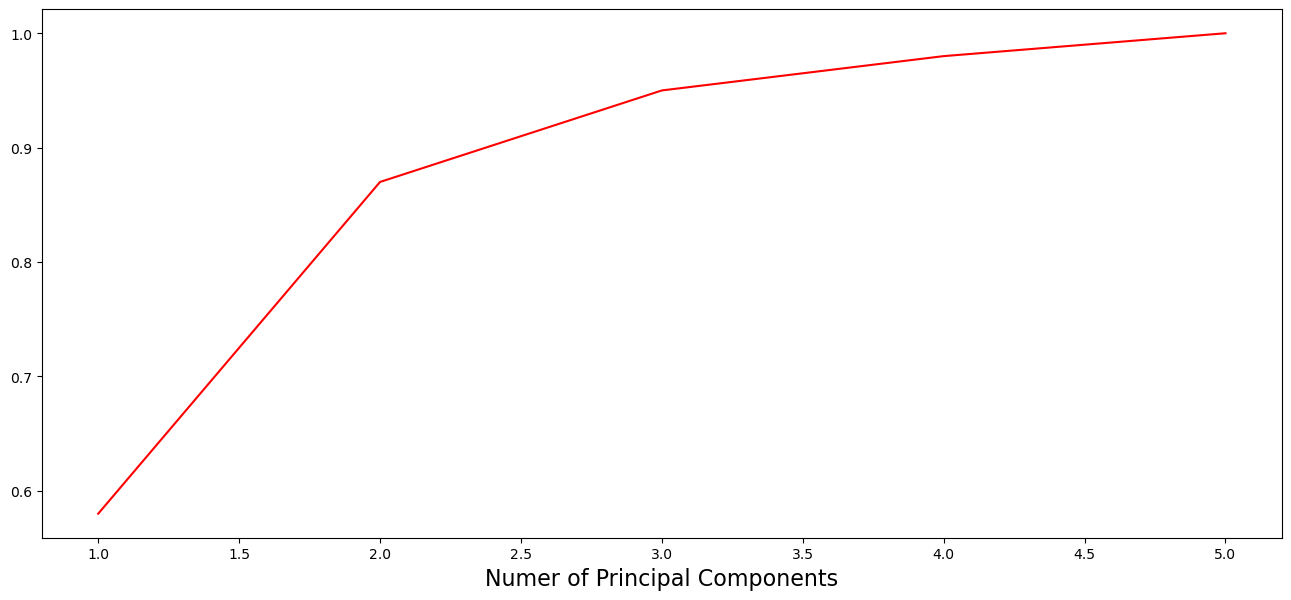

In [23]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

eigenvalue = pca.explained_variance_
print('eigenvalues',eigenvalue)
print('explain_ratio',pca.explained_variance_ratio_)


explain_ratio = pca.explained_variance_ratio_.cumsum().round(2)
print('accumulated explain_ratio ',explain_ratio)

fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(range(1,6), explain_ratio, color='red')
plt.xlabel('Numer of Principal Components', fontsize=16)


## Part B -- transforming the data 

In [24]:
#As can be seen in the accumulated explain_ratio and based on the graph given above, there has to be a minimum of 3 PCA components for the proportion of explained variance to be at least 0.9 

#When there are 3 PCA components, the cummulative explain variance is 0.95.

#LOOK AT THIS IN DETAIL -- UNSURE OF ANSWER 

imp_rank = np.argsort(abs( pca.components_ )[0,:])[::-1] #Return indices 
final = []
for j in imp_rank: 
    final.append(features[j])

print('The 3 PCA components are')
for i in range(0, 3):
    print(final[i])



The 3 PCA components are
G2_scaled
G3_scaled
G1_scaled


In [25]:
#Creating csv file with the reduced data
import csv 
pca_final = PCA(n_components=3)
principalComponents = pca_final.fit_transform(x)
dataframe = pd.DataFrame(principalComponents)

with open('yash_data_reduced.csv', 'w', newline='') as file: 
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(principalComponents)


In [26]:
dataframe

,0,1,2
0,2.131286,-1.904478,0.395291
1,0.377079,-1.287285,0.321735
2,-0.150234,0.878536,-0.001121
3,-1.676912,-0.571828,0.331192
4,-0.559548,-0.374990,-0.208094
...,...,...,...
644,0.524778,-0.747861,-0.240501
645,-2.401428,-0.323148,0.346825
646,0.136823,-1.193677,0.301065
647,1.583662,1.665583,0.194115


In [27]:
totals = {
    0: 0,
    1: 0,
    2: 0
}
for ind, row in dataframe.iterrows():
    for col in totals:
        totals[col]+=row[col]

for col in totals:
    print(totals[col]/649)

1.1632537083899945e-16
-8.211202647458785e-17
-5.388601737394827e-18


In [28]:
#Five number summary for component 1: 
dataframe[0].describe()

count    6.490000e+02
mean     1.163254e-16
std      1.702773e+00
min     -4.255613e+00
25%     -1.122190e+00
50%     -1.274497e-02
75%      1.171323e+00
max      6.200937e+00
Name: 0, dtype: float64

In [29]:
#Five number summary for component 2: 
dataframe[1].describe()

count    6.490000e+02
mean    -8.211203e-17
std      1.210444e+00
min     -2.927694e+00
25%     -8.887867e-01
50%     -2.378362e-01
75%      7.260033e-01
max      4.777154e+00
Name: 1, dtype: float64

In [30]:
#Five number summary for component 3: 
dataframe[2].describe()

count    6.490000e+02
mean    -5.388602e-18
std      6.194442e-01
min     -1.908536e+00
25%     -2.595552e-01
50%      2.135860e-01
75%      3.311916e-01
max      3.374054e+00
Name: 2, dtype: float64

# Task 9

## Data is reloaded 

In [31]:
data_df = pd.read_csv(data_file, sep=';')


In [32]:
G2_mode = data_df['G2'].mode()
G3_mode = data_df['G3'].mode()

In [33]:
data_df['G2'].replace(to_replace = 0, value=G2_mode[0], inplace=True)
data_df['G3'].replace(to_replace = 0, value = G3_mode[0], inplace = True)

In [34]:
#Finding correlation coefficient 
data_df[["G2", "G3"]].corr(method='pearson')


,G2,G3
G2,1.000000,0.923444
G3,0.923444,1.000000


<AxesSubplot:xlabel='G2', ylabel='G3'>

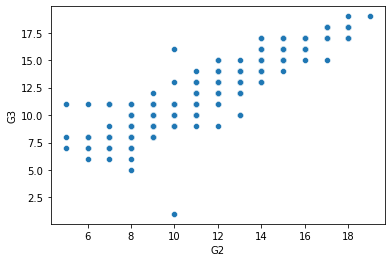

In [35]:
#Scatterplot 
sns.scatterplot(data=data_df, x="G2", y="G3");